In [1]:
import cv2
import numpy as np
import pandas as pd

data = pd.read_pickle('data_64.pkl')
data

,0,1,2,3,4,5,6,7,8,9
0,Audio_Speech_Actors_01-24/Actor_10/03-01-08-01...,audio,speech,surprised,normal,dogs,first,10,Female,"[[-40.15455, -40.443665, -52.322464, -47.76378..."
1,Audio_Speech_Actors_01-24/Actor_10/03-01-06-01...,audio,speech,fearful,normal,kids,second,10,Female,"[[-43.923542, -43.682335, -40.340485, -43.3236..."
2,Audio_Speech_Actors_01-24/Actor_10/03-01-04-02...,audio,speech,sad,strong,dogs,first,10,Female,"[[-46.98153, -50.57455, -48.46379, -53.46179, ..."
3,Audio_Speech_Actors_01-24/Actor_10/03-01-03-02...,audio,speech,happy,strong,kids,first,10,Female,"[[-43.404922, -39.509773, -45.250362, -40.639,..."
4,Audio_Speech_Actors_01-24/Actor_10/03-01-08-02...,audio,speech,surprised,strong,kids,second,10,Female,"[[-47.588303, -44.979008, -52.47441, -43.38246..."
...,...,...,...,...,...,...,...,...,...,...
1435,Audio_Speech_Actors_01-24/Actor_22/03-01-03-02...,audio,speech,happy,strong,kids,first,22,Female,"[[-51.33103, -52.39145, -52.95405, -52.95405, ..."
1436,Audio_Speech_Actors_01-24/Actor_22/03-01-04-02...,audio,speech,sad,strong,kids,second,22,Female,"[[-52.46261, -53.078323, -61.30905, -65.533936..."
1437,Audio_Speech_Actors_01-24/Actor_22/03-01-06-01...,audio,speech,fearful,normal,dogs,first,22,Female,"[[-65.75296, -63.40626, -52.973984, -60.370327..."
1438,Audio_Speech_Actors_01-24/Actor_22/03-01-08-01...,audio,speech,surprised,normal,dogs,second,22,Female,"[[-55.454086, -53.307667, -56.222527, -52.8085..."


### some tests

DescribeResult(nobs=4096, minmax=(-60.368248, 18.679344), mean=-45.15397, variance=263.00873, skewness=0.8308593034744263, kurtosis=-0.15552327001256971)
16.215565


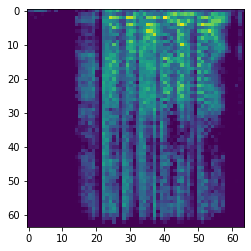

In [2]:
import matplotlib.pyplot as plt
from scipy import stats

print ( stats.describe(data[9][1200],axis=None) )
print(np.std(data[9][1200]))

plt.imshow(data[9][1200])

# Dataset Preparation and Model Creation

(1440, 64, 64, 1)
-92.0762 36.32815
DescribeResult(nobs=5898240, minmax=(0.0, 1.0), mean=0.32343003, variance=0.02219872, skewness=0.6124709248542786, kurtosis=-0.17521115401224607)
(1440, 8)


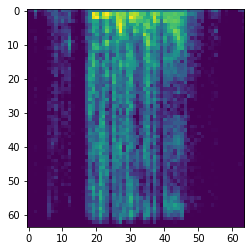

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler

x = data[9].to_list()
y = data[3]

x = np.array(x).reshape(-1,64,64,1)

print ( x.shape )
print ( x.min() , x.max()) 
x = (x - x.min()) / (x.max() - x.min())

print(stats.describe(x,axis=None))

onehot_encoder = LabelBinarizer()
y = onehot_encoder.fit_transform(y)

print(y.shape)

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

x_train.dtype


plt.imshow(x_train[0].reshape(64,64))

/home/luisbch/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/luisbch/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/luisbch/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/luisbch/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/home/luisbch/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/luisbch/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/luisbch/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/luisbch/.local/lib/python3.6/site-packages/tensorboard/compat

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3276928   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

964/964 [==============================] - 4s 4ms/sample - loss: 0.5977 - acc: 0.8195 - val_loss: 1.5823 - val_acc: 0.4517
Epoch 49/54
964/964 [==============================] - 4s 4ms/sample - loss: 0.5497 - acc: 0.8413 - val_loss: 1.6706 - val_acc: 0.4475
Epoch 50/54
964/964 [==============================] - 4s 4ms/sample - loss: 0.5477 - acc: 0.8413 - val_loss: 1.5895 - val_acc: 0.4538
Epoch 51/54
964/964 [==============================] - 4s 4ms/sample - loss: 0.5153 - acc: 0.8641 - val_loss: 1.7465 - val_acc: 0.4139
Epoch 52/54
964/964 [==============================] - 4s 4ms/sample - loss: 0.5108 - acc: 0.8620 - val_loss: 1.5868 - val_acc: 0.4664
Epoch 53/54
964/964 [==============================] - 4s 4ms/sample - loss: 0.4545 - acc: 0.8932 - val_loss: 1.6318 - val_acc: 0.4370
Epoch 54/54
964/964 [==============================] - 4s 4ms/sample - loss: 0.4346 - acc: 0.8838 - val_loss: 1.6141 - val_acc: 0.4349
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


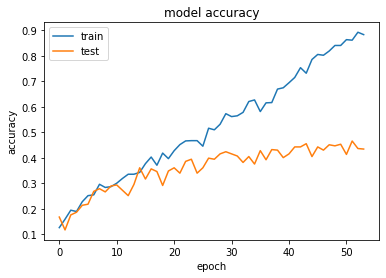

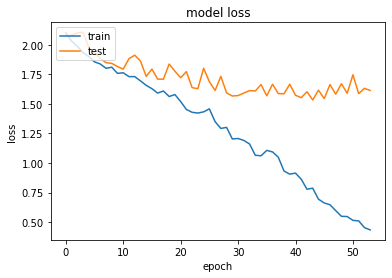

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(64,64,1),activation="relu"))
model.add(Dropout(0.4))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Flatten())
model.add(Dense(128,activation="sigmoid"))
model.add(Dropout(0.3))
model.add(Dense(8,activation="sigmoid"))
model.summary()


model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=54, batch_size=64,validation_data=(x_test,y_test))
print ( history.history.keys() ) 

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


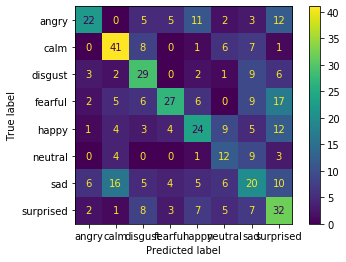

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = onehot_encoder.inverse_transform(y_test)
y_pred = onehot_encoder.inverse_transform(model.predict(x_test))
cm = confusion_matrix(y_true, y_pred,labels=onehot_encoder.classes_)

ConfusionMatrixDisplay(cm,onehot_encoder.classes_).plot()


